# Fetal Health Analysis & Classification

In [56]:
# Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting and data analysis
import seaborn as sns # prettier charts
from sklearn.model_selection import train_test_split # models and machine learning
from sklearn.metrics import classification_report, confusion_matrix # for analyzing the performance of our model

## Setup

In [57]:
# First we load our data and peek into a window to get an idea
data = pd.read_csv("./data/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [58]:
# Let's check our datatypes
data.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [59]:
# Checking for null columns
data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

## Statistical Analysis

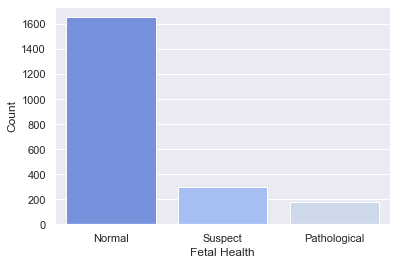

In [60]:
# first let us look at our target data
sns.set_theme(style="darkgrid", palette="coolwarm")
ax = sns.countplot(x=data['fetal_health']);
ax.set_xticklabels(('Normal', 'Suspect', 'Pathological'))
ax.set(xlabel="Fetal Health", ylabel="Count");

Clearly our data is imbalanced, we will deal with this later. Next we will look for correlations in the data.

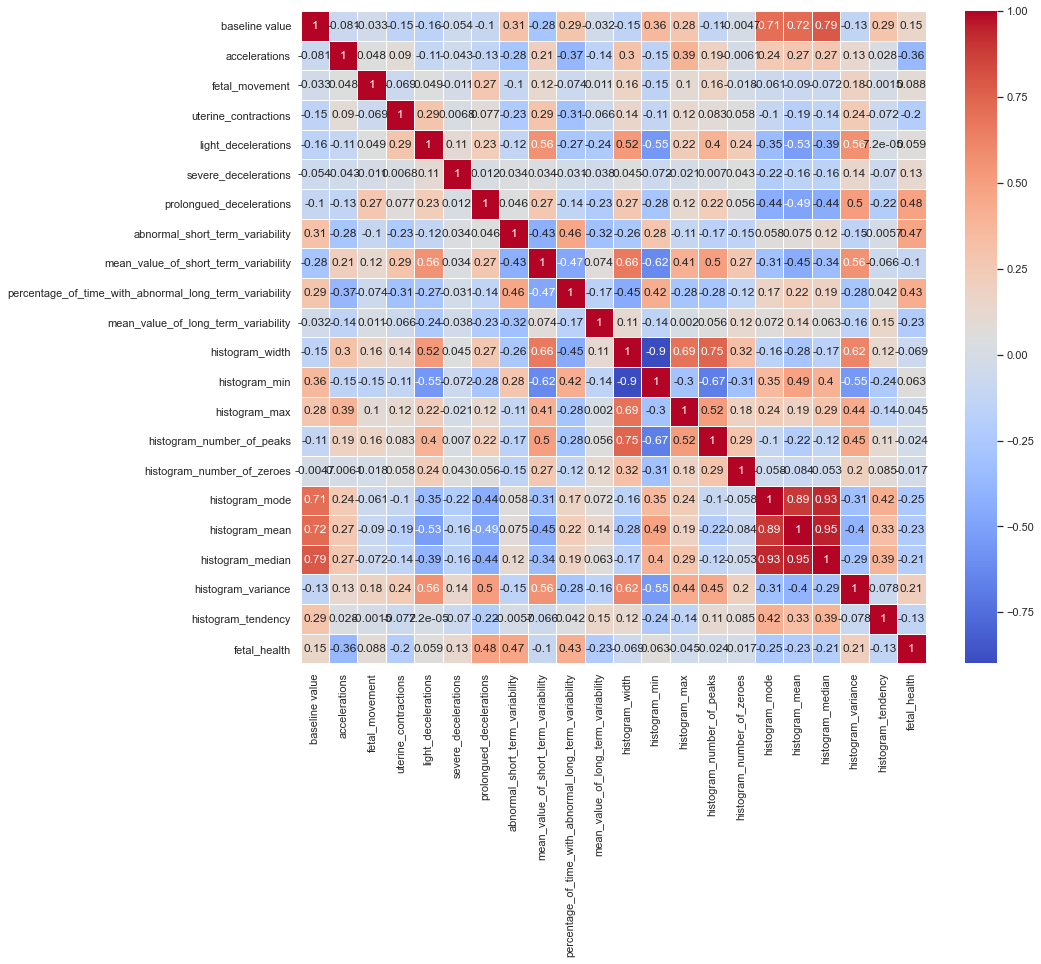

In [61]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=1)
plt.show()

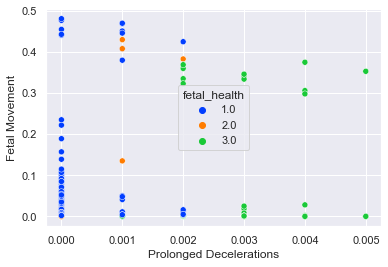

In [62]:
# Since prolongued decelerations correlated closely with our target, we will looks at its contributing factors
sns.scatterplot(data=data, x="prolongued_decelerations", y="fetal_movement", palette="bright",
           hue='fetal_health')
plt.xlabel("Prolonged Decelerations")
plt.ylabel("Fetal Movement")
plt.show()

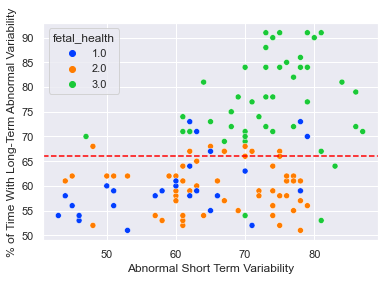

In [63]:
# next we'll look at abnormal short term variability vs. percentage of time with abnormal long term variability
# specifically, we'll look at patients who spent > 50% of the time with abnormal variability
over_50 = data[data["percentage_of_time_with_abnormal_long_term_variability"] > 50.0]
sns.scatterplot(data=over_50, x="abnormal_short_term_variability", y="percentage_of_time_with_abnormal_long_term_variability", palette="bright",
           hue='fetal_health')
plt.axhline(over_50["percentage_of_time_with_abnormal_long_term_variability"].mean(), color="red", linestyle="--")
plt.ylabel("% of Time With Long-Term Abnormal Variability")
plt.xlabel("Abnormal Short Term Variability")
plt.show()

## Dealing with the imbalanced data

In [64]:
# Create our X and y and take a look at their shapes
X = data.drop("fetal_health", axis=1)
y = data["fetal_health"]

# Take a look at the shape of our sets
X.shape, y.shape

((2126, 21), (2126,))

In [65]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()
oversample_X, oversample_y = oversample.fit_resample(X, y);
Counter(oversample_y)

Counter({2.0: 1655, 1.0: 1655, 3.0: 1655})

## Model Training

In [66]:
# No additional cleaning needs to be done, so we can set up our model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=20, random_state=0)


X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train, y_train);

In [67]:
# Let's model the oversampled data as well to see if our results differ
model_os = RandomForestClassifier(max_depth=20, random_state=0)


X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(oversample_X,
                                                   oversample_y,
                                                   test_size=0.2)
model_os.fit(X_train_os, y_train_os);

## Model Analysis
Here we will analyze the effectiveness of our model

In [68]:
# Evaluate the model
model.score(X_train, y_train)

0.9982352941176471

In [69]:
model_os.score(X_train_os, y_train_os)

0.999496475327291

In [70]:
model.score(X_test, y_test)

0.9577464788732394

In [71]:
model_os.score(X_test_os, y_test_os)

0.9879154078549849

In [72]:
# We'll run a classification report now to check our scores
pred_model = model.predict(X_test)
print("Classification Report")
print(classification_report(y_test, pred_model))

Classification Report
              precision    recall  f1-score   support

         1.0       0.97      0.98      0.98       330
         2.0       0.90      0.84      0.87        63
         3.0       0.97      0.91      0.94        33

    accuracy                           0.96       426
   macro avg       0.94      0.91      0.93       426
weighted avg       0.96      0.96      0.96       426



In [73]:
pred_model_os = model_os.predict(X_test_os)
print("Oversampled Classification Report")
print(classification_report(y_test_os, pred_model_os))

Oversampled Classification Report
              precision    recall  f1-score   support

         1.0       0.99      0.98      0.99       341
         2.0       0.98      0.98      0.98       331
         3.0       0.99      1.00      1.00       321

    accuracy                           0.99       993
   macro avg       0.99      0.99      0.99       993
weighted avg       0.99      0.99      0.99       993



<AxesSubplot:>

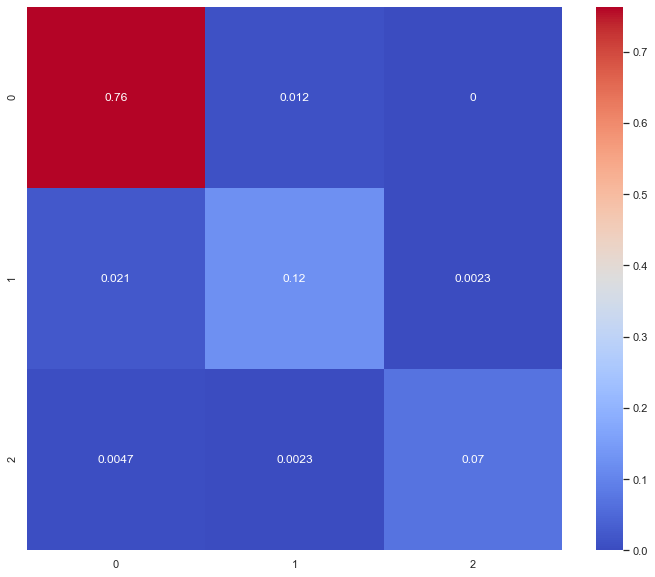

In [74]:
# We'll evaluate with a confusion matrix next
plt.subplots(figsize=(12, 10))
matrix = confusion_matrix(y_test, pred_model)
sns.heatmap(matrix/np.sum(matrix), cmap="coolwarm", annot = True)

<AxesSubplot:>

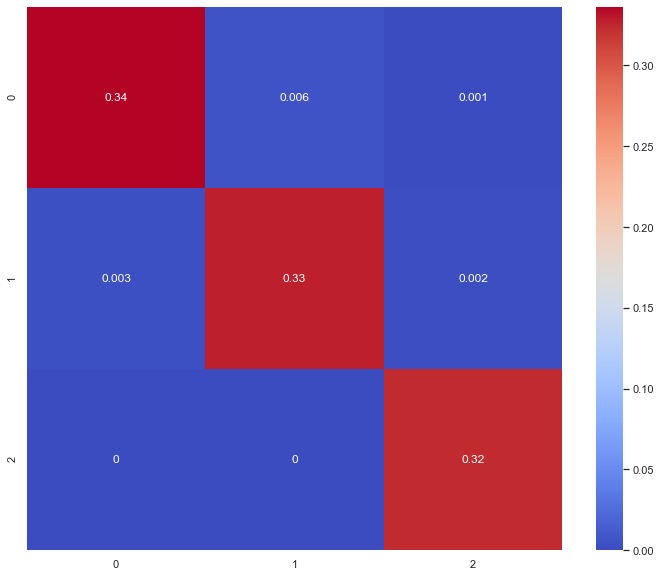

In [75]:
# We'll evaluate with a confusion matrix next
plt.subplots(figsize=(12, 10))
matrix = confusion_matrix(y_test_os, pred_model_os)
sns.heatmap(matrix/np.sum(matrix), cmap="coolwarm", annot = True)

## Conclusion

Oversampling our data provided a much more accurate model, particularly in predicting "suspect" cases.